<a href="https://colab.research.google.com/github/ibtissam01/Text_Mining/blob/main/TP1_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

In [ ]:
data = pd.read_csv('IMDB Dataset.csv')

In [ ]:
# Afficher les informations sur les colonnes et les types de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review,sentiment  50000 non-null  object
 1   Unnamed: 1        45 non-null     object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
# Afficher les statistiques descriptives du dataset
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
# Compter le nombre d'exemples positifs et négatifs dans le dataset
positive_count = data[data['sentiment'] == 'positive'].shape[0]
negative_count = data[data['sentiment'] == 'negative'].shape[0]
print('Nombre d\'exemples positifs :', positive_count)
print('Nombre d\'exemples négatifs :', negative_count)

Nombre d'exemples positifs : 25000
Nombre d'exemples négatifs : 25000


In [ ]:
data['longueur'] = data['review'].apply(lambda x: len(x.split()))

moyenne_longueur = data['longueur'].mean()
print(f"Longueur moyenne des critiques : {moyenne_longueur}")

Longueur moyenne des critiques : 231.15694


In [ ]:
data.head()

,review,sentiment,longueur
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


from matplotlib import pyplot as plt
_df_0['longueur'].plot(kind='hist', bins=20, title='longueur')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['longueur'].plot(kind='line', figsize=(8, 4), title='longueur')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sentiment'].value_counts()
    for x_label, grp in _df_4.groupby('review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('review')
_ = plt.ylabel('sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='longueur', y='review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='longueur', y='sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

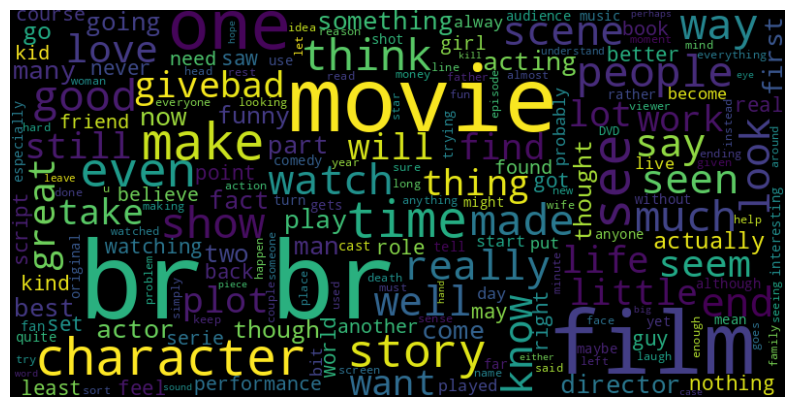

In [ ]:
from wordcloud import WordCloud
texte_complet = ' '.join(data['review'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(texte_complet)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
print("Exemples de critiques positives:")
print(data[data['sentiment'] == 'positive']['review'].head())

print("\nExemples de critiques négatives:")
print(data[data['sentiment'] == 'negative']['review'].head())

Exemples de critiques positives:
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
Name: review, dtype: object

Exemples de critiques négatives:
3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
Name: review, dtype: object


In [ ]:
data['sent_Bi'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
data.head()

,review,sentiment,longueur,sent_Bi
0,One of the other reviewers has mentioned that ...,positive,307,1
1,A wonderful little production. <br /><br />The...,positive,162,1
2,I thought this was a wonderful way to spend ti...,positive,166,1
3,Basically there's a family where a little boy ...,negative,138,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1


In [ ]:
import re
from string import punctuation

def nettoyer_texte(texte):
    texte = texte.lower()
    texte = ''.join([caractere for caractere in texte if caractere not in punctuation])
    # Supprimer les balises HTML
    texte = re.sub('<.*?>', '', texte)
    return texte

In [ ]:
data['review'] = data['review'].apply(nettoyer_texte)

In [ ]:
data.review


0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
# Tokeniser les textes
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#longueur de séquence nominale de 200
max_length = 200
# Tronquer et compléter les séquences numériques
X = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
exemple_texte = data['review'][0]
exemple_sequence = X[0]
print(f"Exemple de texte original :\n{exemple_texte}\n")
print(f"Exemple de séquence numérique correspondante :\n{exemple_sequence}")

Exemple de texte original :
one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where 

In [ ]:
y = data['sent_Bi']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Taille de l\'ensemble d\'entraînement : {len(x_train)}')
print(f'Taille de l\'ensemble de test : {len(x_test)}')

Taille de l'ensemble d'entraînement : 40000
Taille de l'ensemble de test : 10000


In [ ]:
# Créer le modèle RNN basique
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
313/313 [==============================] - 30s 82ms/step - loss: 0.6814 - accuracy: 0.5424 - val_loss: 0.6578 - val_accuracy: 0.5656
Epoch 2/10
313/313 [==============================] - 23s 73ms/step - loss: 0.6314 - accuracy: 0.6353 - val_loss: 0.6565 - val_accuracy: 0.5736
Epoch 3/10
313/313 [==============================] - 26s 82ms/step - loss: 0.5962 - accuracy: 0.6473 - val_loss: 0.6651 - val_accuracy: 0.5607
Epoch 4/10
313/313 [==============================] - 55s 177ms/step - loss: 0.5195 - accuracy: 0.7019 - val_loss: 0.5219 - val_accuracy: 0.7788
Epoch 5/10
313/313 [==============================] - 41s 132ms/step - loss: 0.5175 - accuracy: 0.7424 - val_loss: 0.7434 - val_accuracy: 0.5369
Epoch 6/10
313/313 [==============================] - 48s 153ms/step - loss: 0.4781 - accuracy: 0.7278 - val_loss: 0.7753 - val_accuracy: 0.5461
Epoch 7/10
313/313 [==============================] - 36s 116ms/step - loss: 0.4110 - accuracy: 0.7850 - val_loss: 0.8318 - val_accur

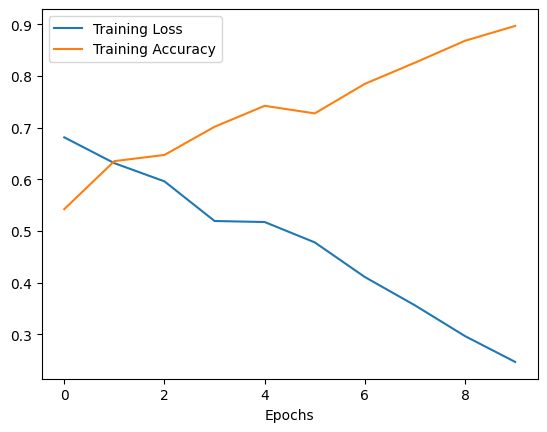

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

313/313 [==============================] - 12s 38ms/step
Précision du modèle : 54.20%


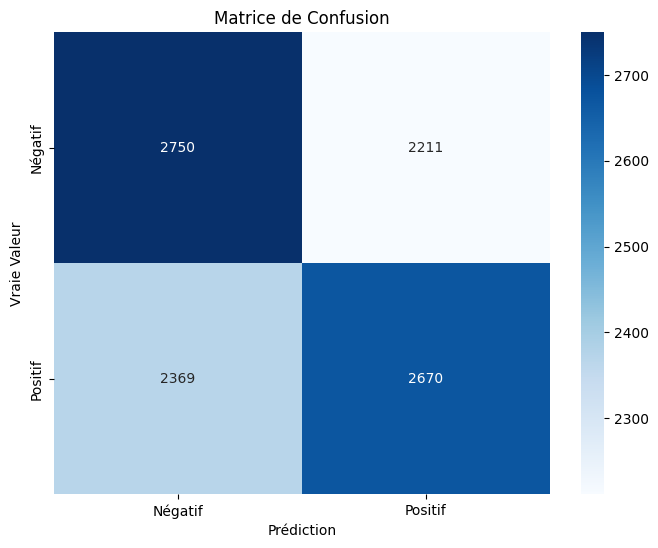

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      4961
           1       0.55      0.53      0.54      5039

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion')
plt.show()

# Afficher le rapport de classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred))

Epoch 1/10
313/313 [==============================] - 41s 127ms/step - loss: 0.6884 - accuracy: 0.4990 - val_loss: 0.6779 - val_accuracy: 0.5039
Epoch 2/10
313/313 [==============================] - 31s 99ms/step - loss: 0.6625 - accuracy: 0.4990 - val_loss: 0.6690 - val_accuracy: 0.5039
Epoch 3/10
313/313 [==============================] - 29s 94ms/step - loss: 0.6515 - accuracy: 0.4990 - val_loss: 0.6691 - val_accuracy: 0.5039
Epoch 4/10
313/313 [==============================] - 30s 96ms/step - loss: 0.6291 - accuracy: 0.4990 - val_loss: 0.6020 - val_accuracy: 0.5039
Epoch 5/10
313/313 [==============================] - 31s 98ms/step - loss: 0.6305 - accuracy: 0.4990 - val_loss: 0.6628 - val_accuracy: 0.5039
Epoch 6/10
313/313 [==============================] - 31s 100ms/step - loss: 0.6017 - accuracy: 0.4990 - val_loss: 0.6427 - val_accuracy: 0.5039
Epoch 7/10
313/313 [==============================] - 34s 107ms/step - loss: 0.6088 - accuracy: 0.4990 - val_loss: 0.6560 - val_accura

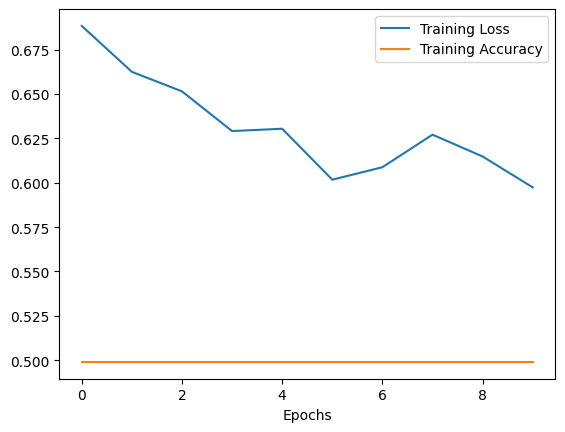

In [ ]:
# Créer le modèle RNN basique
model_adjusted = Sequential()
model_adjusted.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model_adjusted.add(SimpleRNN(units=64))
model_adjusted.add(Dense(units=1, activation='softmax'))

model_adjusted.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 10

history_adjusted = model_adjusted.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(history_adjusted.history['loss'], label='Training Loss')
plt.plot(history_adjusted.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

313/313 [==============================] - 4s 12ms/step
Précision du modèle : 54.20%


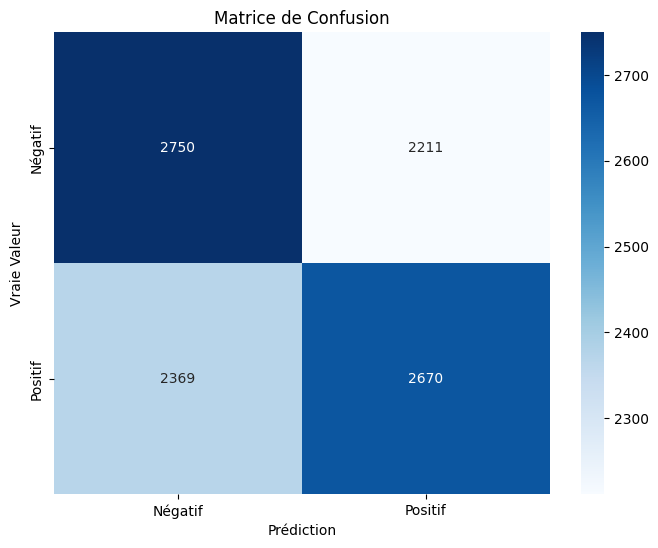

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      4961
           1       0.55      0.53      0.54      5039

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



In [ ]:
y_pred_adjusted = model_adjusted.predict(x_test)
y_pred_adjusted = (y_pred > 0.5).astype(int)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion')
plt.show()

# Afficher le rapport de classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred_adjusted))

 Implémenter un réseau RNN pour effectuer la tâche du Part Of Speech

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [ ]:
sentences = [['I', 'feel', 'hungry'],
             ['tensorflow', 'is', 'very', 'difficult'],
             ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
             ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
       ['noun', 'verb', 'adverb', 'adjective'],
       ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
       ['noun', 'verb', 'adverb', 'adjective', 'verb']]

word_list = ['<pad>'] + sorted(set(sum(sentences, [])))
word2idx = {word: idx for idx, word in enumerate(word_list)}
idx2word = {idx: word for idx, word in enumerate(word_list)}

pos_list = sorted(set(sum(pos, [])))
pos2idx = {pos: idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx: pos for idx, pos in enumerate(pos_list)}


In [ ]:
print(word_list)
print(pos_list)


['<pad>', 'I', 'a', 'changing', 'deep', 'difficult', 'fast', 'feel', 'for', 'framework', 'hungry', 'is', 'learning', 'tensorflow', 'very']
['adjective', 'adverb', 'determiner', 'noun', 'preposition', 'pronoun', 'verb']


In [ ]:
print(word2idx)
print(pos2idx)

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{'adjective': 0, 'adverb': 1, 'determiner': 2, 'noun': 3, 'preposition': 4, 'pronoun': 5, 'verb': 6}


In [ ]:
print(idx2word)
print(idx2pos)

{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
{0: 'adjective', 1: 'adverb', 2: 'determiner', 3: 'noun', 4: 'preposition', 5: 'pronoun', 6: 'verb'}


In [ ]:
X = [[word2idx[w] for w in s ] for s in sentences]
y = [[pos2idx[p] for p in po ] for po in pos]

In [ ]:
X = pad_sequences(X, maxlen=10, padding='post')
y = pad_sequences(y, maxlen=7, padding='post')

In [ ]:
X

array([[ 1,  7, 10,  0,  0,  0,  0,  0,  0,  0],
       [13, 11, 14,  5,  0,  0,  0,  0,  0,  0],
       [13, 11,  2,  9,  8,  4, 12,  0,  0,  0],
       [13, 11, 14,  6,  3,  0,  0,  0,  0,  0]], dtype=int32)

In [ ]:
model_pos = Sequential()
model_pos.add(Embedding(15, 32, input_length=10))
model_pos.add(SimpleRNN(10))
model_pos.add(Dense(7,activation="relu"))
model_pos.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 32)            480       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 10)                430       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 987 (3.86 KB)
Trainable params: 987 (3.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_pos.compile(optimizer="adam",loss="mse",metrics=["accuracy"])

In [ ]:
X, y = np.array(X, dtype=np.uint8), np.array(y, dtype=np.uint8)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 9.6476 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 9.5937 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 9.5401 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 9.4871 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 20ms/step - loss: 9.4197 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 9.3436 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 9.2483 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 9.1517 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 9.0555 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 14ms/step - loss: 8.9573 - accuracy: 0.

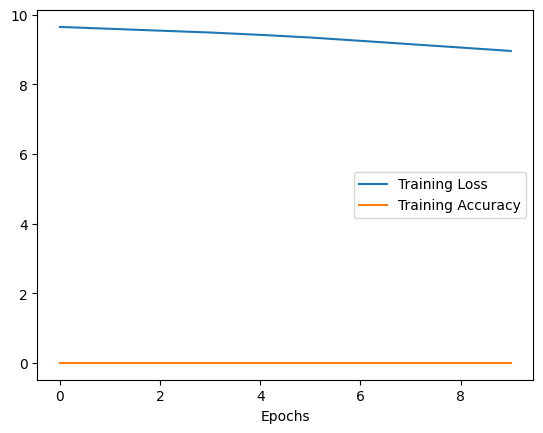

In [ ]:
hist_pos= model_pos.fit(X,y, epochs=10)

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(hist_pos.history['loss'], label='Training Loss')
plt.plot(hist_pos.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
y_pred = model_pos.predict(X)
y_pred = (y_pred > 0.5).astype(int)


1/1 [==============================] - 0s 157ms/step


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 9.4136 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 9.2276 - accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 9.0473 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 8.8740 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 8.7093 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 8.5544 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 8.4106 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 8.2784 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 8.1580 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 15ms/step - loss: 8.0489 - accuracy: 1.0000


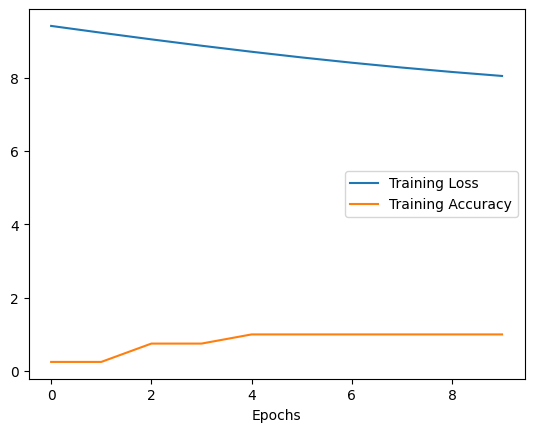

In [ ]:
model_pos_tanh = Sequential()
model_pos_tanh.add(Embedding(15, 32, input_length=10))
model_pos_tanh.add(SimpleRNN(10))
model_pos_tanh.add(Dense(7,activation="tanh"))
model_pos_tanh.compile(optimizer="adam",loss="mse",metrics=["accuracy"])
hist_pos_tanh= model_pos_tanh.fit(X,y, epochs=10)

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(hist_pos_tanh.history['loss'], label='Training Loss')
plt.plot(hist_pos_tanh.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
y_pred = model_pos_tanh.predict(X)
y_pred = (y_pred > 0.5).astype(int)

1/1 [==============================] - 0s 226ms/step


In [ ]:
y

array([[5, 6, 0, 0, 0, 0, 0],
       [3, 6, 1, 0, 0, 0, 0],
       [3, 6, 2, 3, 4, 0, 3],
       [3, 6, 1, 0, 6, 0, 0]], dtype=uint8)

In [ ]:
y_pred

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0]])

In [ ]:
.
